<a href="https://colab.research.google.com/github/kathdevx/emotionalAI/blob/main/test_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soundfile

In [16]:
import soundfile as sf
f = sf.SoundFile('/content/a01_1.wav')

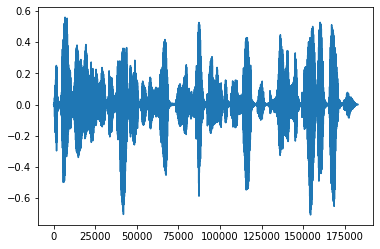

In [18]:
import matplotlib.pyplot as plt
test = f.read()
plt.plot(test)